<a href="https://colab.research.google.com/github/yicjiang/Machine-Learning-Project_Car-Insurance-Claim-Prediction/blob/main/Machine_Learning_in_Car_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA810 - Final Project

Source of Data: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

## **Data Exploring**##

In [ ]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA810/'

Mounted at /content/drive


In [ ]:
#set data
rawdata = pd.read_csv(data_folder + 'Car_Insurance_Claim.csv')
df   = rawdata.astype({'AGE': 'category', 
                       'GENDER':'category', 
                       'RACE':'category', 
                       'DRIVING_EXPERIENCE':'category', 
                       'EDUCATION':'category',
                       'INCOME':'category',
                       'VEHICLE_YEAR':'category',
                       'VEHICLE_OWNERSHIP':'category',
                       'MARRIED':'category',
                       'CHILDREN':'category',
                       'POSTAL_CODE':'category',
                       'ANNUAL_MILEAGE':'category',
                       'VEHICLE_TYPE':'category',
                       'SPEEDING_VIOLATIONS':'category',
                       'DUIS':'category',
                       'PAST_ACCIDENTS':'category',
                       'OUTCOME':'category',
                       })

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  category
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  category
 11  CHILDREN             10000 non-null  category
 12  POSTAL_CODE          10000 non-null  category
 13  ANNUAL_MILEAGE       9043 non-null   category
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


#**Preprocessing Pipeline Building**#

In [ ]:
df.drop('ID', inplace=True, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = .20, random_state=16)
train_set.shape, test_set.shape

((8000, 18), (2000, 18))

In [ ]:
insurance = train_set.copy()

In [ ]:
insurance = train_set.drop("OUTCOME", axis=1)  # predictors
insurance_labels = train_set["OUTCOME"].copy() # target

In [ ]:
insurance[(insurance['CREDIT_SCORE'].isnull() ) & (insurance['ANNUAL_MILEAGE'].isnull())].shape[0]

69

Since the number of rows when CREDIT_SCORE and ANNUAL MILEAGE are bothe null is 69 , if we simply dropna, we would have more than 15% observations removed. That will make the dataset baised.

In [ ]:
#feature scaling using standardscaler
from sklearn.preprocessing import StandardScaler
df_num = df.select_dtypes(include=[np.number])
std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

In [ ]:
null_rows_idx = insurance["CREDIT_SCORE"].isnull()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # We choose median since the distribution is roughly normal.
insurance_num = insurance.select_dtypes(include=[np.number]) 
imputer.fit(insurance_num)            
X = imputer.transform(insurance_num)  
insurance_tr = pd.DataFrame(X, columns=insurance_num.columns,
                          index=insurance_num.index)
insurance_tr.loc[null_rows_idx].head()

,CREDIT_SCORE
624,0.527912
862,0.527912
5518,0.527912
873,0.527912
145,0.527912


Since credit score is our only numerical variable, there is no difference using simple imputer and iterative imputer. Thus, we would just comment out the iterative immputer and left it there for understanding purpose.



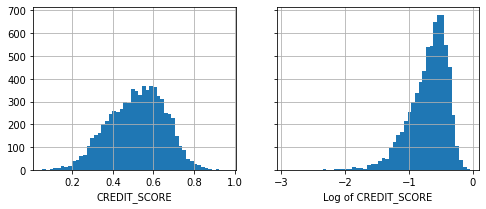

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
insurance_num_std_scaled = std_scaler.fit_transform(insurance_num)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
insurance["CREDIT_SCORE"].hist(ax=axs[0], bins=50)
insurance["CREDIT_SCORE"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("CREDIT_SCORE")
axs[1].set_xlabel("Log of CREDIT_SCORE")
plt.show()

In [ ]:
from scipy import stats
print(stats.normaltest(insurance["CREDIT_SCORE"],nan_policy = 'omit'),
      stats.normaltest(insurance["CREDIT_SCORE"].apply(np.log),nan_policy = 'omit'))

NormaltestResult(statistic=122.61213948869167, pvalue=2.3719864449077276e-27) NormaltestResult(statistic=1532.6532584707986, pvalue=0.0)


Even though the original distribution for credit score is highly normalized, we realized that the log transformation would even further decrease its pvalue.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(insurance[["CREDIT_SCORE"]])
pd.concat([insurance["CREDIT_SCORE"], log_pop], axis=1)

,CREDIT_SCORE,CREDIT_SCORE
4930,0.494067,-0.705084
687,0.384761,-0.955132
6141,0.453599,-0.790541
204,0.450015,-0.798475
624,NaN,NaN
...,...,...
635,0.514097,-0.665343
1345,NaN,NaN
581,0.389381,-0.943196
2169,0.714686,-0.335912


In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

insurance_num_prepared = num_pipeline.fit_transform(insurance_num)
insurance_num_prepared[:2].round(2)

def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out
    
monkey_patch_get_signature_names_out()

df_insurance_num_prepared = pd.DataFrame(
    insurance_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=insurance_num.index)

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [ ]:
num_pipeline
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ['AGE',
               'GENDER', 
               'RACE', 
               'DRIVING_EXPERIENCE', 
               'EDUCATION',
               'INCOME',
               'VEHICLE_YEAR',
               'VEHICLE_OWNERSHIP',
               'MARRIED',
               'CHILDREN',
               'POSTAL_CODE',
               'ANNUAL_MILEAGE',
               'VEHICLE_TYPE',
               'SPEEDING_VIOLATIONS',
               'DUIS',
               'PAST_ACCIDENTS',
]

num_attribs = ["CREDIT_SCORE"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))



preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include= 'category')),
)

In [ ]:
from sklearn import set_config
set_config(display='diagram') 
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f06bfc1afd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f06bfc1a490>)])

In [ ]:
insurance_prep = preprocessing.fit_transform(insurance)

In [ ]:
preprocessing.get_feature_names_out()

array(['pipeline-1__CREDIT_SCORE', 'pipeline-2__AGE_16-25',
       'pipeline-2__AGE_26-39', 'pipeline-2__AGE_40-64',
       'pipeline-2__AGE_65+', 'pipeline-2__GENDER_female',
       'pipeline-2__GENDER_male', 'pipeline-2__RACE_majority',
       'pipeline-2__RACE_minority', 'pipeline-2__DRIVING_EXPERIENCE_0-9y',
       'pipeline-2__DRIVING_EXPERIENCE_10-19y',
       'pipeline-2__DRIVING_EXPERIENCE_20-29y',
       'pipeline-2__DRIVING_EXPERIENCE_30y+',
       'pipeline-2__EDUCATION_high school', 'pipeline-2__EDUCATION_none',
       'pipeline-2__EDUCATION_university',
       'pipeline-2__INCOME_middle class', 'pipeline-2__INCOME_poverty',
       'pipeline-2__INCOME_upper class',
       'pipeline-2__INCOME_working class',
       'pipeline-2__VEHICLE_OWNERSHIP_0.0',
       'pipeline-2__VEHICLE_OWNERSHIP_1.0',
       'pipeline-2__VEHICLE_YEAR_after 2015',
       'pipeline-2__VEHICLE_YEAR_before 2015', 'pipeline-2__MARRIED_0.0',
       'pipeline-2__MARRIED_1.0', 'pipeline-2__CHILDREN_0.0',
 

In [ ]:
pd.DataFrame(insurance_prep.toarray())
df_prepared_fr = pd.DataFrame(pd.DataFrame(insurance_prep.toarray()))
df_prepared_fr.columns = columns=preprocessing.get_feature_names_out()
df_prepared_fr.index = insurance.index
df_prepared_fr

,pipeline-1__CREDIT_SCORE,pipeline-2__AGE_16-25,pipeline-2__AGE_26-39,pipeline-2__AGE_40-64,pipeline-2__AGE_65+,pipeline-2__GENDER_female,pipeline-2__GENDER_male,pipeline-2__RACE_majority,pipeline-2__RACE_minority,pipeline-2__DRIVING_EXPERIENCE_0-9y,...,pipeline-2__PAST_ACCIDENTS_5,pipeline-2__PAST_ACCIDENTS_6,pipeline-2__PAST_ACCIDENTS_7,pipeline-2__PAST_ACCIDENTS_8,pipeline-2__PAST_ACCIDENTS_9,pipeline-2__PAST_ACCIDENTS_10,pipeline-2__PAST_ACCIDENTS_11,pipeline-2__PAST_ACCIDENTS_12,pipeline-2__PAST_ACCIDENTS_14,pipeline-2__PAST_ACCIDENTS_15
4930,-0.191588,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
687,-1.031762,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6141,-0.502641,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,-0.530195,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
624,0.068560,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.037626,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.068560,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,-0.996251,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2169,1.504191,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Train Test Split**

In [ ]:
train_set.head()
df_X = train_set.drop('OUTCOME', axis=1)
df_y = train_set['OUTCOME']
print(df_X.head())

X_train = preprocessing.fit_transform(df_X)
y_train = df_y.values
X_test = preprocessing.transform(test_set)
y_test = test_set["OUTCOME"]


        AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION         INCOME  \
4930  26-39  female  majority             10-19y  high school  working class   
687   16-25  female  minority               0-9y         none        poverty   
6141  16-25  female  majority               0-9y         none        poverty   
204   26-39  female  majority             10-19y   university   middle class   
624   26-39    male  majority               0-9y  high school   middle class   

      CREDIT_SCORE VEHICLE_OWNERSHIP VEHICLE_YEAR MARRIED CHILDREN  \
4930      0.494067               0.0  before 2015     0.0      1.0   
687       0.384761               0.0  before 2015     0.0      0.0   
6141      0.453599               0.0  before 2015     1.0      0.0   
204       0.450015               1.0  before 2015     0.0      1.0   
624            NaN               1.0  before 2015     0.0      1.0   

     POSTAL_CODE ANNUAL_MILEAGE VEHICLE_TYPE SPEEDING_VIOLATIONS DUIS  \
4930       92101        1

In [ ]:
cv_mean = pd.DataFrame(columns = ['Model','Score'])
acc = pd.DataFrame(columns = ['Model','Accuracy_Score','Balanced_Accuracy_Score'])

#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_pipe = make_pipeline(preprocessing, RandomForestClassifier(n_estimators=100, random_state=42))
rf_scores = cross_val_score(rf_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
cv_mean = cv_mean.append({'Model' : 'RandomForest_Default', 'Score' : rf_scores.mean().round(3)},ignore_index = True)
rf_scores.mean().round(3)


0.797

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
])
param_grid = [ 
    {'random_forest__max_depth': [2, 5, 10], 
    'random_forest__min_samples_leaf': [2, 5, 10], 
    'random_forest__max_features': ["sqrt", "log2", None]}, 
    ]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
16,1.758725,0.018705,0.069321,0.001331,5,None,5,"{'random_forest__max_depth': 5, 'random_forest...",0.827927,0.813899,0.823112,0.821646,0.005820,1
17,1.790272,0.024892,0.073744,0.002746,5,None,10,"{'random_forest__max_depth': 5, 'random_forest...",0.826444,0.813836,0.823718,0.821332,0.005416,2
15,1.767532,0.039155,0.072510,0.002479,5,None,2,"{'random_forest__max_depth': 5, 'random_forest...",0.827050,0.812479,0.823112,0.820880,0.006154,3
26,5.091020,0.045693,0.079934,0.000048,10,None,10,"{'random_forest__max_depth': 10, 'random_fores...",0.821108,0.816765,0.817174,0.818349,0.001958,4
25,5.545500,0.043576,0.080257,0.001429,10,None,5,"{'random_forest__max_depth': 10, 'random_fores...",0.819019,0.816765,0.815690,0.817158,0.001387,5


## Halving Grid Search##

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [ 
    {'random_forest__max_depth': [2, 5, 10], 
    'random_forest__min_samples_leaf': [2, 5, 10], 
    'random_forest__max_features': ["sqrt", "log2", None]}, 
    ]

print('The parameter grid : ')
print(param_grid)


halving_grid_search = HalvingGridSearchCV(full_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  

halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(6)

The parameter grid : 
[{'random_forest__max_depth': [2, 5, 10], 'random_forest__min_samples_leaf': [2, 5, 10], 'random_forest__max_features': ['sqrt', 'log2', None]}]
The best parameters are  {'random_forest__max_depth': 5, 'random_forest__max_features': None, 'random_forest__min_samples_leaf': 2}


,iter,n_resources,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,mean_test_score
39,3,7992,5,None,2,0.821875
38,2,2664,5,None,2,0.814220
36,2,2664,5,None,5,0.811596
37,2,2664,10,sqrt,2,0.787202
29,1,888,5,None,2,0.764028
34,1,888,10,sqrt,2,0.761634


## Parameter Selection ##

###Top RFC Grid Search Parameters

In [ ]:
forest_clf_g = RandomForestClassifier(max_depth= 5, min_samples_leaf = 5,max_features = None, n_estimators=100, random_state=42)
forest_clf_g.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=5,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
y_pred = forest_clf_g.predict(X_test)

acc = acc.append({'Model' : 'RandomForest_Grid_Search', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))


Accuracy score is:  0.8405
balanced accuracy score is:  0.813


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf_g, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'RandomForest_Grid_Search', 'Score' : forest_scores.mean().round(3)},ignore_index = True)

forest_scores.mean().round(3)

0.822

### Top RFC Halving Grid Search Parameters

In [ ]:
forest_clf_h = RandomForestClassifier(max_depth= 10, min_samples_leaf = 5,max_features = None, n_estimators=100, random_state=42)
forest_clf_h.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=5,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
y_pred = forest_clf_h.predict(X_test)

acc = acc.append({'Model' : 'RandomForest_Halving_Search', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.838
balanced accuracy score is:  0.8096


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf_h, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'RandomForest_Halving_Search', 'Score' : forest_scores.mean().round(3)},ignore_index = True)

forest_scores.mean().round(3)

0.82

In [ ]:
cv_mean

,Model,Score
0,RandomForest_Default,0.797
1,RandomForest_Grid_Search,0.822
2,RandomForest_Halving_Search,0.820


In [ ]:
acc

,Model,Accuracy_Score,Balanced_Accuracy_Score
0,RandomForest_Grid_Search,0.8405,0.8130
1,RandomForest_Halving_Search,0.8380,0.8096


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
lr_pipe = make_pipeline(preprocessing, LogisticRegression())
lr_scores = cross_val_score(lr_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'LogisticReg_Default', 'Score' : lr_scores.mean().round(3)},ignore_index = True)

lr_scores.mean().round(3)

0.821

## Grid Search ##

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pca = PCA()
#Standard Scaler 
scaler = StandardScaler()

logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
grid_search = GridSearchCV(pipe, param_grid, n_jobs=2)
grid_search.fit(df_prepared_fr, insurance_labels)
print('The best parameters are ', grid_search.best_params_)

grid_search.best_estimator_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


The best parameters are  {'logistic__C': 10000.0, 'pca__n_components': 60}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.296566,0.053737,0.008015,0.001356,10000.0,60,"{'logistic__C': 10000.0, 'pca__n_components': 60}",0.839375,0.847500,0.836250,0.861875,0.838125,0.844625,0.009442,1
14,0.350601,0.031207,0.008995,0.001049,21.544347,60,"{'logistic__C': 21.54434690031882, 'pca__n_com...",0.836250,0.844375,0.833125,0.865625,0.840000,0.843875,0.011507,2
9,0.280974,0.013828,0.008890,0.000759,0.046416,60,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.835000,0.841250,0.835625,0.856875,0.836875,0.841125,0.008172,3
13,0.226130,0.010122,0.008329,0.000125,21.544347,45,"{'logistic__C': 21.54434690031882, 'pca__n_com...",0.831875,0.837500,0.830625,0.857500,0.833750,0.838250,0.009901,4
18,0.233317,0.014335,0.008830,0.000903,10000.0,45,"{'logistic__C': 10000.0, 'pca__n_components': 45}",0.824375,0.837500,0.830625,0.861875,0.833125,0.837500,0.012906,5


## Halving Grid Search ##

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

pca = PCA()
#Standard Scaler 
scaler = StandardScaler()

logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}

halving_grid_search = HalvingGridSearchCV(pipe, param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_prepared_fr, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  

halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()


The best parameters are  {'logistic__C': 21.54434690031882, 'pca__n_components': 60}


,iter,n_resources,param_logistic__C,param_pca__n_components,mean_test_score
29,2,7992,21.544347,60,0.803662
28,2,7992,10000.0,60,0.801303
27,2,7992,10000.0,30,0.788014
20,1,2664,21.544347,60,0.811657
24,1,2664,10000.0,60,0.810138


## Parameter Selection##

The results of grid search and halving grid search are the same.

In [ ]:
scaler = StandardScaler(with_mean=False)
log_g = LogisticRegression(C = 10000, max_iter=10000, tol=0.1)
pca = PCA(n_components = 60)
log_pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
log_pipe.fit(X_train.toarray(), y_train)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

In [ ]:
y_pred = log_pipe.predict(X_test.toarray())

acc = acc.append({'Model' : 'LogisticReg_Halving&Grid', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.825
balanced accuracy score is:  0.791


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(log_pipe, X_train.toarray(), y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'LogisticReg_Halving&Grid', 'Score' : lr_scores.mean().round(3)},ignore_index = True)

log_scores.mean().round(3)

0.805

#**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipe = make_pipeline(preprocessing, KNeighborsClassifier())
knn_scores = cross_val_score(knn_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'KNN_Default', 'Score' : knn_scores.mean().round(3)},ignore_index = True)

knn_scores.mean().round(3)

0.773

In [ ]:
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('knn', KNeighborsClassifier()),
])

## Grid Search##

In [ ]:
param_grid = [ 
    {'knn__n_neighbors': np.arange(2, 11, 2), 
     'knn__p': np.arange(2, 11, 2)
     }, 
    ]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                                 scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) 
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()



The best parameters are  {'knn__n_neighbors': 10, 'knn__p': 2}


,param_knn__n_neighbors,param_knn__p,mean_test_score
20,10,2,0.769904
15,8,2,0.761599
10,6,2,0.750459
5,4,2,0.738266
0,2,2,0.695683


## Halving Grid Search##

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [ 
    {'knn__n_neighbors': np.arange(2, 11, 2), 
     'knn__p': np.arange(2, 11, 2)
     }, 
    ]


halving_grid_search = HalvingGridSearchCV(full_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_prepared_fr, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_) 
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()


The best parameters are  {'knn__n_neighbors': 10, 'knn__p': 2}


,iter,n_resources,param_knn__n_neighbors,param_knn__p,mean_test_score
36,2,7992,10,2,0.766693
35,2,7992,8,2,0.761092
34,2,7992,6,2,0.748680
33,1,2664,10,2,0.755386
32,1,2664,8,2,0.751694


## Parameter Selection##

The result from grid search is  the same as the halving search.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 10,p=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_clf.predict(X_test)

acc = acc.append({'Model' : 'KNN_Halving&Grid', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.8125
balanced accuracy score is:  0.7662


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'KNN_Halving&Grid', 'Score' : knn_scores.mean().round(3)},ignore_index = True)

knn_scores.mean().round(3)

0.765

#**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc_pipe = make_pipeline(preprocessing, SVC(C=1, kernel='poly', degree=1))
svc_scores = cross_val_score(svc_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'SVM_Default', 'Score' : svc_scores.mean().round(3)},ignore_index = True)

svc_scores.mean().round(3)

0.818

## Grid Search##

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_pipeline = Pipeline([
    ("preprocess_pipeline", preprocessing),
    ("svm", SVC()),
])

param_grid = [
  {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100, 1000]},
  {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]},
]

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(df_X, df_y)
print('The best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

The best parameters are  {'svm__C': 1000, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,mean_test_score
10,1000,rbf,0.001,NaN,0.853750
1,10,linear,NaN,NaN,0.853500
0,1,linear,NaN,NaN,0.853375
2,100,linear,NaN,NaN,0.853125
11,1000,rbf,0.0001,NaN,0.853000
3,1000,linear,NaN,NaN,0.852750
8,100,rbf,0.001,NaN,0.852750
9,100,rbf,0.0001,NaN,0.842000
6,10,rbf,0.001,NaN,0.841875
30,1000,poly,0.001,2,0.839499


## Halving Grid Search##

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

svm_pipeline = Pipeline([
    ("preprocess_pipeline", preprocessing),
    ("svm", SVC()),
])
param_grid = [
  {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100, 1000]},
  {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]},
]

halving_grid_search = HalvingGridSearchCV(svm_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(6)

The best parameters are  {'svm__C': 10, 'svm__kernel': 'linear'}


,iter,n_resources,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,mean_test_score
53,3,7992,10,linear,NaN,NaN,0.823043
52,3,7992,100,linear,NaN,NaN,0.822973
49,2,2664,10,linear,NaN,NaN,0.815658
50,2,2664,100,linear,NaN,NaN,0.815598
48,2,2664,1000,rbf,0.001,NaN,0.814820
51,2,2664,1,linear,NaN,NaN,0.813836


## Parameter Selection##


### Top SVM Grid Search Parameter ###

In [ ]:
from sklearn.svm import SVC
SVC_g = SVC(C=1000,kernel = 'rbf',gamma = 0.001)
SVC_g.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [ ]:
y_pred = SVC_g.predict(X_test)

acc = acc.append({'Model' : 'SVM_Grid', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.836
balanced accuracy score is:  0.812


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
svm_g_scores = cross_val_score(SVC_g, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'SVM_Grid', 'Score' : svm_g_scores.mean().round(3)},ignore_index = True)

svm_g_scores.mean().round(3)

0.831

### Top SVM Halving Grid Search Parameter ###

In [ ]:
from sklearn.svm import SVC
SVC_h = SVC(C=100,kernel = 'linear')
SVC_h.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [ ]:
y_pred = SVC_h.predict(X_test)

acc = acc.append({'Model' : 'SVM_Halving', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.8405
balanced accuracy score is:  0.8165


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
svm_h_scores = cross_val_score(SVC_h, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'SVM_Halving', 'Score' : svm_h_scores.mean().round(3)},ignore_index = True)

svm_h_scores.mean().round(3)

0.827

#**XGB**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
XGB_pipe = make_pipeline(preprocessing, GradientBoostingClassifier(n_estimators=100,learning_rate=1.0))
XGB_scores = cross_val_score(XGB_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'XGB_Default', 'Score' : XGB_scores.mean().round(3)},ignore_index = True)

XGB_scores.mean().round(2)

0.8

### Grid Search###

In [ ]:
param_grid = dict({'n_estimators': [50, 1000],'max_depth': [1,10],'learning_rate' : [0.01, 0.1]})
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
grid_search = GridSearchCV(gb, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(df_prepared_fr,df_y)
print('The best parameters are ', grid_search.best_params_)
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

The best parameters are  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,10.802377,0.099072,0.025603,0.000979,0.1,1,1000,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.925045,0.917478,0.914851,0.936338,0.914611,0.921665,0.008252,1
1,11.046642,0.092982,0.028065,0.000661,0.01,1,1000,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.918495,0.907123,0.906459,0.930337,0.908582,0.914199,0.009170,2
6,4.032788,0.019449,0.017443,0.001505,0.1,10,50,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.918030,0.906328,0.893143,0.915627,0.907986,0.908223,0.008741,3
3,81.318939,0.868853,0.164426,0.003563,0.01,10,1000,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.914013,0.903089,0.894032,0.913418,0.906108,0.906132,0.007360,4
4,0.553455,0.004449,0.009574,0.000430,0.1,1,50,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.903960,0.891460,0.893987,0.917003,0.895152,0.900312,0.009347,5


### Halving Grid Search ###

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

xgb_pipeline = Pipeline([
    ("preprocess_pipeline", preprocessing),
    ("xgb", GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)),
])
param_grid = dict({'xgb__n_estimators': [50, 1000],'xgb__max_depth': [1,10],'xgb__learning_rate' : [0.01, 0.1]})


halving_grid_search = HalvingGridSearchCV(xgb_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X,df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(6)

The best parameters are  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 1, 'xgb__n_estimators': 1000}


,iter,n_resources,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,mean_test_score
10,1,7998,0.1,1,1000,0.816029
9,1,7998,0.1,10,1000,0.797480
8,1,7998,0.01,10,1000,0.797104
5,0,2666,0.1,1,1000,0.791277
7,0,2666,0.1,10,1000,0.775421
3,0,2666,0.01,10,1000,0.770742


The result from grid search is the same as halving grid search.

### Parameter Selection###

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,max_depth=1)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=1000)

In [ ]:
y_pred = gb_clf.predict(X_test)

acc = acc.append({'Model' : 'XGB_Halving&Grid', 
                  'Accuracy_Score' : accuracy_score(test_set["OUTCOME"], y_pred), 
                  'Balanced_Accuracy_Score':balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4)},
                  ignore_index = True)

print('Accuracy score is: ',accuracy_score(test_set["OUTCOME"], y_pred))
print('balanced accuracy score is: ',balanced_accuracy_score(test_set["OUTCOME"], y_pred).round(4))

Accuracy score is:  0.834
balanced accuracy score is:  0.8047


In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
xgb_clf_scores = cross_val_score(gb_clf, X_train, y_train, cv=10, scoring='balanced_accuracy')

cv_mean = cv_mean.append({'Model' : 'XGB_Halving&Grid', 'Score' : xgb_clf_scores.mean().round(3)},ignore_index = True)

xgb_clf_scores.mean().round(3)

0.818

#**Fit ROC**

In [ ]:
print(cv_mean.sort_values(by=['Score'],ascending=False))
print('\n')
print(acc.sort_values(by=['Balanced_Accuracy_Score'],ascending=False))

                          Model  Score
8                      SVM_Grid  0.831
9                   SVM_Halving  0.827
1      RandomForest_Grid_Search  0.822
3           LogisticReg_Default  0.821
4      LogisticReg_Halving&Grid  0.821
2   RandomForest_Halving_Search  0.820
7                   SVM_Default  0.818
11             XGB_Halving&Grid  0.818
10                  XGB_Default  0.803
0          RandomForest_Default  0.797
5                   KNN_Default  0.773
6              KNN_Halving&Grid  0.765


                         Model  Accuracy_Score  Balanced_Accuracy_Score
5                  SVM_Halving          0.8405                   0.8165
0     RandomForest_Grid_Search          0.8405                   0.8130
4                     SVM_Grid          0.8360                   0.8120
1  RandomForest_Halving_Search          0.8380                   0.8096
6             XGB_Halving&Grid          0.8340                   0.8047
2     LogisticReg_Halving&Grid          0.8250             

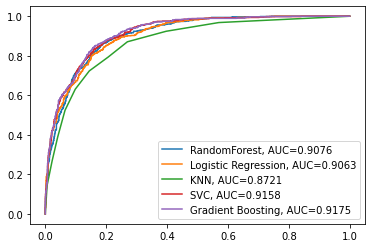

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier(max_depth= 10, min_samples_leaf = 5,max_features = None, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RandomForest, AUC="+str(auc))

# #fit logistic regression model and plot ROC curve
scaler = StandardScaler(with_mean=False)
log_g = LogisticRegression(C = 10000, max_iter=10000, tol=0.1)
pca = PCA(n_components = 60)
log_pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
log_pipe.fit(X_train.toarray(), y_train)
y_pred = log_pipe.predict_proba(X_test.toarray())[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit KNN regression model and plot ROC curve
model = KNeighborsClassifier(n_neighbors = 10,p=2)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))


#fit SVM model and plot ROC curve
model = SVC(C=100,kernel = 'linear',probability=True)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,max_depth=1)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0)

In [ ]:
#Load ourseleves inthe dataset and fit on a svm to see our outcome result
raw_ex = pd.read_csv(data_folder + 'Car_Insurance_Claim_Example.csv')
df_X = df_X.append(raw_ex)
df_X = df_X.tail(4)
X_train1 = preprocessing.transform(df_X)

y_pred = model.predict(X_train1)
y_pred_prob = model.predict_proba(X_train1)[:, 1]
print(y_pred)

[0. 0. 0. 0.]


In [ ]:
print(raw_ex)

       ID    AGE GENDER      RACE DRIVING_EXPERIENCE   EDUCATION       INCOME  \
0  111111  16-25   male  minority               0-9y  university  upper class   
1  222222  16-25   male  minority               0-9y  university  upper class   
2  333333  16-25   male  minority               0-9y  university  upper class   
3  444444  16-25   male  minority               0-9y  university  upper class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0           NaN                  1   after 2015        0         0   
1           NaN                  1   after 2015        0         0   
2           NaN                  0   after 2015        0         0   
3           NaN                  1   after 2015        0         0   

   POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0          NaN           10000   sports car                    1     0   
1          NaN           20000        sedan                    0     0   
2          NaN       

#**Reference**


https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
https://www.statology.org/plot-multiple-roc-curves-python/
https://colab.research.google.com/drive/1sLPqMnYzr5blGzNAUSpkQ3PK8IJ4Y_Mc?usp=sharing#scrollTo=laKnvuqbfS7A
https://colab.research.google.com/drive/1Sk8UJK9R9vYiJR2vLrEe1niexNCYcOKh?usp=sharing
